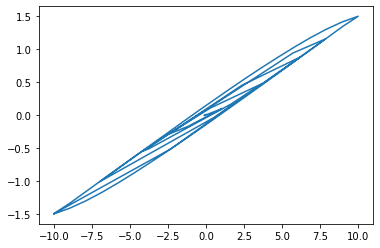

In [1]:
import torch
from matplotlib import pyplot as plt

from hysteresis.base import BaseHysteresis


def density_function(mesh_pts):
    x = mesh_pts[:, 0]
    y = mesh_pts[:, 1]
    return torch.exp(-(y - x) / 0.5)


train_h = torch.linspace(-10.0, 10.0, 20)
train_h = torch.cat((train_h, train_h.flipud()))

# add on a decaying scan
f = 4
decay_t = torch.linspace(0, 1, 5 * f)
decay_h = -10.0 * (1 - decay_t) * torch.cos(2 * 3.14 * f * decay_t)
train_h = torch.cat((train_h, decay_h))

toy_model = BaseHysteresis(train_h=train_h, mesh_scale=0.1)
toy_model.scale = 1.0
toy_model.offset = -1.0 / 2
toy_model.hysterion_density = density_function(toy_model.mesh_points)
train_m = toy_model(train_h)
toy_model.set_history(train_h.double(), train_m.detach())
torch.save(toy_model, "toy_magnet_decay.pt")


plt.plot(train_h, train_m.detach())
plt.show()